In [12]:
from __future__ import print_function, division

import os
import fnmatch
from time import time

import numpy as np
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
plt.ion()
# set random seed for reproducibility
np.random.seed(31)

VERBOSE = 1

In [4]:
def report_to_table(report):
    report = report.splitlines()
    res = []
    res.append(['']+report[0].split())
    for row in report[2:-2]:
       res.append(row.split())
    lr = report[-1].split()
    res.append([' '.join(lr[:3])]+lr[3:])
    return np.array(res)

In [5]:
# read image data and save as vectors
DATA_PATH = '../data/CroppedYale'
file_format = '*.pgm'

img_width, img_height = 168, 192
image_dimension = img_height*img_width
n_samples = 2424

image_vectors = np.empty(shape=(n_samples, image_dimension), dtype='float32')
labels = np.empty(shape=(n_samples, 1), dtype='<S10')

print('Reading image data from:', DATA_PATH)
t0 = time()
index = 0
for dirpath, dirs, files in os.walk(DATA_PATH):
    for file_name in fnmatch.filter(files, file_format):
        image_path = os.path.join(dirpath, file_name)
        # read image from file
        image = sp.misc.imread(image_path, flatten=True)
        # flatten image
        image_vector = image.ravel()
        # check that image has the right dimensions
        if image_vector.shape[0] == image_dimension:
            # save image vector
            image_vectors[index, :] = image_vector
            
            # use directory name as label for sample
            labels[index, :] = os.path.basename(dirpath)
            
            index += 1
        else:
            if VERBOSE >= 2:
                print('Wrong dimensions:', image_path)

print(index, 'images read')
print(np.unique(labels).shape[0], 'unique labels')
print('done in %0.3fs' % (time() - t0))

Reading image data from: ../data/CroppedYale
2424 images read
38 unique labels
done in 0.670s


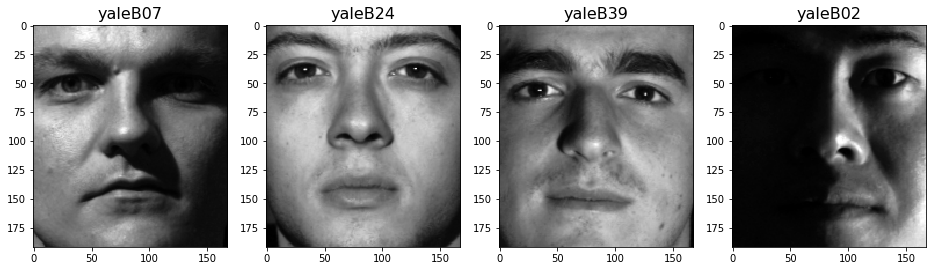

In [6]:
# plot random sample of images from the data set
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(16, 5))
# choose random indices uniformly
random_index = np.random.choice(np.arange(n_samples), size=(4), replace=False)

for col, index in enumerate(random_index):
    ax[col].set_title(labels[index][0], fontsize=16)
    # reshape image to original dimensions
    image = image_vectors[index, :].reshape(img_height, img_width)
    # plot image
    ax[col].imshow(image, cmap=plt.cm.Greys_r)

plt.savefig('report/image_sample.png', bbox_inches='tight')
plt.show()

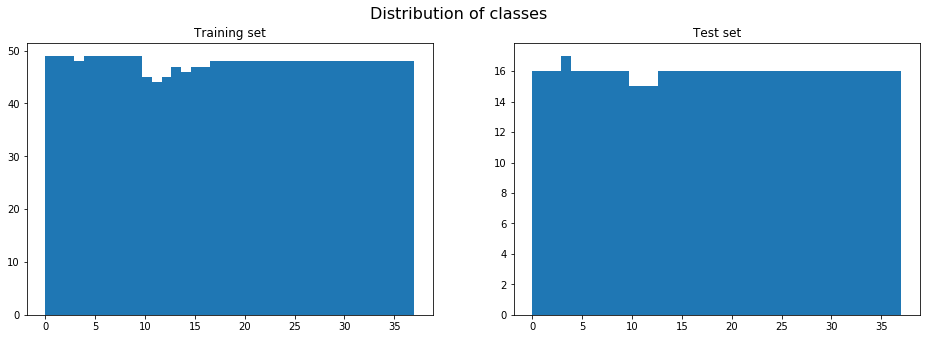

In [20]:
# get feature data
X = image_vectors

# encode labels as numbers
encoder = LabelEncoder()
y = encoder.fit_transform(labels.ravel())

# shuffle and split data into training and test sets
# data is stratified so we get approximately and equal number of 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, shuffle=True)

# plot distribution of classes in training and test sets
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 5))

ax[0].hist(y_train, bins=38)
ax[0].set_title('Training set')

ax[1].hist(y_test, bins=38)
ax[1].set_title('Test set')

plt.suptitle('Distribution of classes', fontsize=16)
plt.savefig('report/class_distribution.png', bbox_inches='tight')

plt.show()

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [22]:
y_pred = model.predict(X_test)

# create classification report
class_names = sorted(np.unique(labels))
report = classification_report(y_test, y_pred, target_names=class_names)

report_table = report_to_table(report)

report_df = pd.DataFrame(report_table[1:], columns=report_table[0])
report_df.rename(columns={'': 'class'}, inplace=True)
report_df.set_index('class', inplace=True)
report_df.to_csv('report/classification_report.csv')
display(report_df)

precision recall f1-score support
class                                        
yaleB01          1.00   1.00     1.00      16
yaleB02          0.94   0.94     0.94      16
yaleB03          1.00   1.00     1.00      16
yaleB04          1.00   0.94     0.97      17
yaleB05          1.00   1.00     1.00      16
yaleB06          1.00   1.00     1.00      16
yaleB07          1.00   0.94     0.97      16
yaleB08          1.00   0.94     0.97      16
yaleB09          1.00   0.94     0.97      16
yaleB10          1.00   1.00     1.00      16
yaleB11          1.00   1.00     1.00      15
yaleB12          1.00   1.00     1.00      15
yaleB13          1.00   0.87     0.93      15
yaleB15          1.00   1.00     1.00      16
yaleB16          1.00   1.00     1.00      16
yaleB17          0.94   1.00     0.97      16
yaleB18          1.00   1.00     1.00      16
yaleB19          1.00   1.00     1.00      16
yaleB20          0.89   1.00     0.94      16
yaleB21          1.00   0.88     0.93      16
yaleB22          1.00   1.00     1.00      16
yaleB23          1.00   1.00     1.00      16
yaleB24          1.00   1.00     1.00      16
yaleB25          1.00   1.00     1.00      16
yaleB26          1.00   1.00     1.00      16
yaleB27          1.00   0.88     0.93      16
yaleB28          1.00   0.94     0.97      16
yaleB29          1.00   0.94     0.97      16
yaleB30          1.00   1.00     1.00      16
yaleB31          1.00   1.00     1.00      16
yaleB32          0.94   0.94     0.94      16
yaleB33          1.00   1.00     1.00      16
yaleB34          1.00   1.00     1.00      16
yaleB35          0.59   1.00     0.74      16
yaleB36          0.93   0.88     0.90      16
yaleB37          0.88   0.94     0.91      16
yaleB38          1.00   0.88     0.93      16
yaleB39          1.00   1.00     1.00      16
avg / total      0.98   0.97     0.97     606

In [24]:
print('Number of missclassifications:', (y_test != y_pred).sum())
print(accuracy_score(y_test, y_pred))

Number of missclassifications: 19
0.968646864686


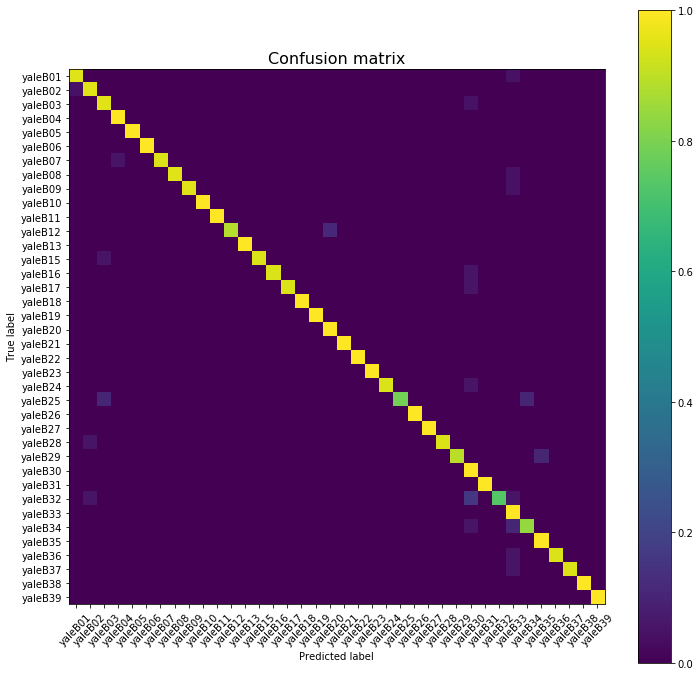

In [19]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
class_names = sorted(np.unique(labels))

fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cnf_matrix, interpolation='nearest')
ax.set_title('Confusion matrix', fontsize=16)
fig.colorbar(cax)
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_names)

ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

plt.savefig('report/confusion_matrix.png', bbox_inches='tight')
plt.show()

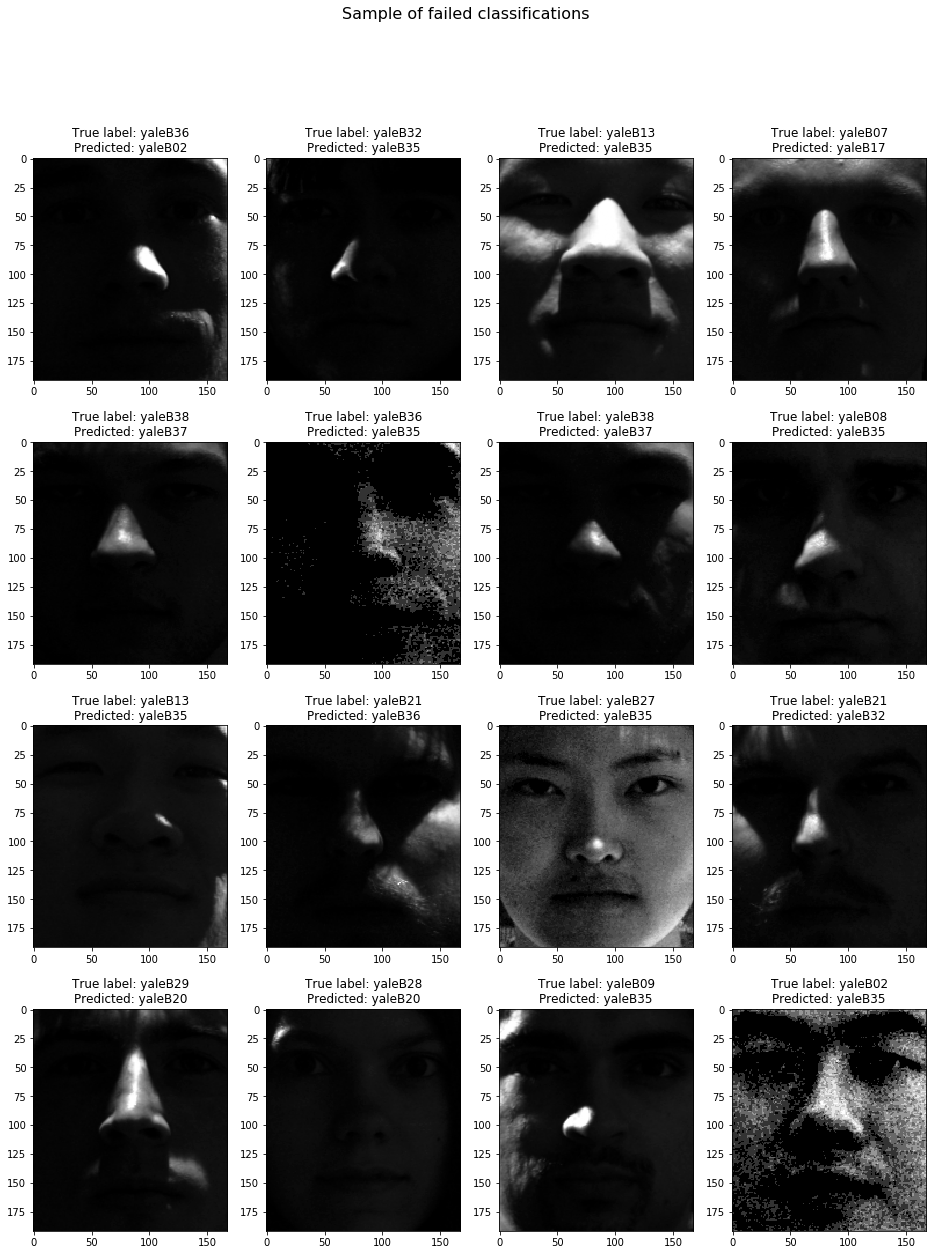

In [25]:
# show a number of failed classifications

# decode class label names from predicted and true encoded classes
true_classes = encoder.inverse_transform(y_test)
pred_classes = encoder.inverse_transform(y_pred)


ROWS, COLS = 4, 4
# choose a number of random failed classifications
error_index = np.random.choice(np.argwhere(y_pred != y_test).ravel(), 
                               ROWS*COLS, replace=False)

fig, ax = plt.subplots(ncols=COLS, nrows=ROWS, figsize=(16, 20))

for ix, err_ix in enumerate(error_index):
    rix, cix = divmod(ix, COLS)
    
    true = true_classes[err_ix]
    pred = pred_classes[err_ix]
    title = 'True label: {}\nPredicted: {}'.format(true, pred)
    ax[rix, cix].set_title(title)
    
    image = X_test[err_ix].reshape(img_height, img_width)
    # plot image
    ax[rix, cix].imshow(image, cmap=plt.cm.Greys_r)
    
plt.suptitle('Sample of failed classifications', fontsize=16)
plt.savefig('report/wrong_predictions.png', bbox_inches='tight')
plt.show(block=True)